Predicted Score for 6 hours studied: 80.81


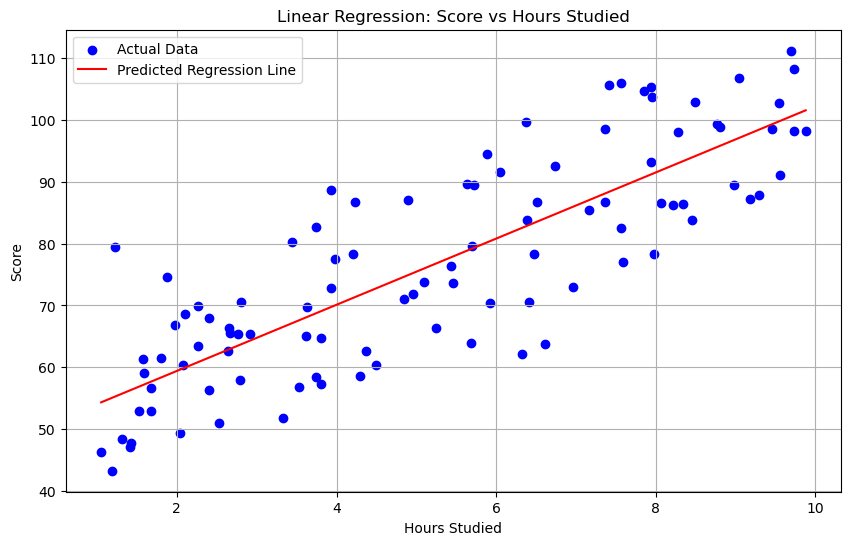

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('student_data.csv')  # Use your path here

# Extract single feature and target
X = data['Hours_Studied'].values
y = data['Score'].values

# Step 1: Normalize the input feature for stable training
X_mean = np.mean(X)
X_std = np.std(X)
X_norm = (X - X_mean) / X_std  # Now X_norm is normalized X

# Step 2: Initialize weight (w) and bias (b)
w = 0.0
b = 0.0

# Step 3: Define the cost function (Mean Squared Error)
def compute_cost(X, y, w, b):
    m = len(y)
    y_pred = w * X + b
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

# Step 4: Gradient Descent to minimize cost
def gradient_descent(X, y, w, b, alpha=0.01, iterations=1000):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        y_pred = w * X + b

        # Compute gradients
        dw = (1 / m) * np.sum((y_pred - y) * X)
        db = (1 / m) * np.sum(y_pred - y)

        # Update parameters
        w -= alpha * dw
        b -= alpha * db

        # Store the cost at each step
        cost_history.append(compute_cost(X, y, w, b))

    return w, b, cost_history

# Step 5: Train the model using gradient descent
w_final, b_final, cost_history = gradient_descent(X_norm, y, w, b)

# Step 6: Make a prediction
input_hours = 6
input_norm = (input_hours - X_mean) / X_std
predicted_score = w_final * input_norm + b_final
print(f"Predicted Score for {input_hours} hours studied: {predicted_score:.2f}")

# Step 7: Plot the regression line and data
# Prepare line values
X_plot = np.linspace(X.min(), X.max(), 100)
X_plot_norm = (X_plot - X_mean) / X_std
y_plot = w_final * X_plot_norm + b_final

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_plot, y_plot, color='red', label='Predicted Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.title('Linear Regression: Score vs Hours Studied')
plt.legend()
plt.grid(True)
plt.show()
